In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
con = sqlite3.connect(r'C:\Users\vaibh\Data Science\database.sqlite')

In [3]:
query="""
SELECT * FROM sqlite_master WHERE type='table'
"""
queryconn=pd.read_sql_query(query,con)
print(queryconn)

     type             name         tbl_name  rootpage  \
0   table           Player           Player         2   
1   table       Extra_Runs       Extra_Runs         3   
2   table   Batsman_Scored   Batsman_Scored         7   
3   table    Batting_Style    Batting_Style        10   
4   table    Bowling_Style    Bowling_Style        11   
5   table          Country          Country        12   
6   table           Season           Season        14   
7   table             City             City        15   
8   table          Outcome          Outcome        16   
9   table           Win_By           Win_By        17   
10  table     Wicket_Taken     Wicket_Taken        18   
11  table            Venue            Venue        21   
12  table       Extra_Type       Extra_Type        23   
13  table         Out_Type         Out_Type        24   
14  table    Toss_Decision    Toss_Decision        25   
15  table           Umpire           Umpire        26   
16  table             Team     

In [4]:
#1. No of players in the IPL country wise

In [5]:
query = """ SELECT c.Country_Name as Country_Name, COUNT(*) as Player_Count FROM Player p JOIN
            Country c ON p.Country_Name = c.Country_Id GROUP BY p.Country_Name ORDER BY Player_Count DESC 
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

    Country_Name  Player_Count
0          India           262
1      Australia            72
2   South Africa            39
3    New Zealand            22
4      Sri Lanka            20
5    West Indies            19
6        England            14
7       Pakistan            13
8     Bangladesh             5
9      Zimbabwea             2
10   Netherlands             1


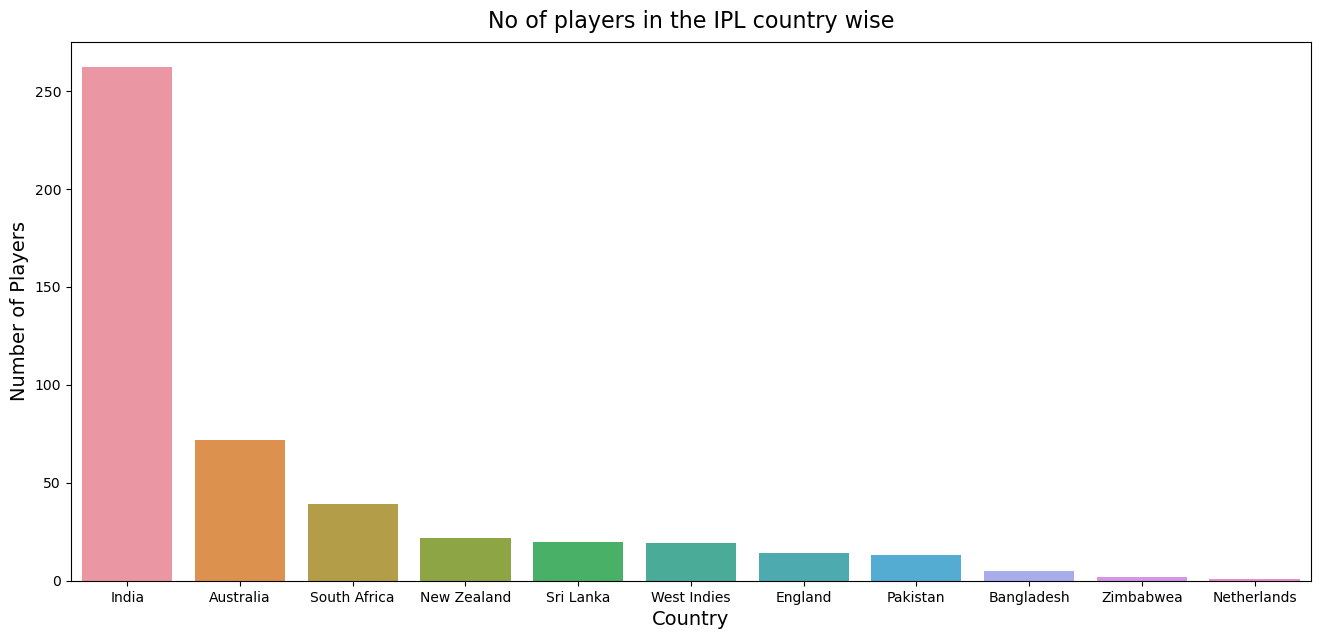

In [6]:
plt.figure(figsize = (16,7))
sns.barplot(x = 'Country_Name',y = 'Player_Count',data = queryconn)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Number of Players', fontsize = 14)
plt.title('No of players in the IPL country wise',fontsize = 16, pad = 10)
plt.show()

In [7]:
#2. Number of matches played in each stadium

In [8]:
query = """ SELECT COUNT(*) as Matches_Played, v.Venue_Name as Venue_Name FROM  Match m JOIN Venue v
            ON m.Venue_Id = v.Venue_Id GROUP BY m.Venue_Id ORDER BY Matches_Played DESC
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

    Matches_Played                                         Venue_Name
0               58                              M Chinnaswamy Stadium
1               54                                       Eden Gardens
2               53                                   Feroz Shah Kotla
3               49                                   Wankhede Stadium
4               48                    MA Chidambaram Stadium, Chepauk
5               41          Rajiv Gandhi International Stadium, Uppal
6               35         Punjab Cricket Association Stadium, Mohali
7               33                             Sawai Mansingh Stadium
8               17                         Subrata Roy Sahara Stadium
9               17                         Dr DY Patil Sports Academy
10              15                                          Kingsmead
11              12                       Sardar Patel Stadium, Motera
12              12                                    SuperSport Park
13              11  

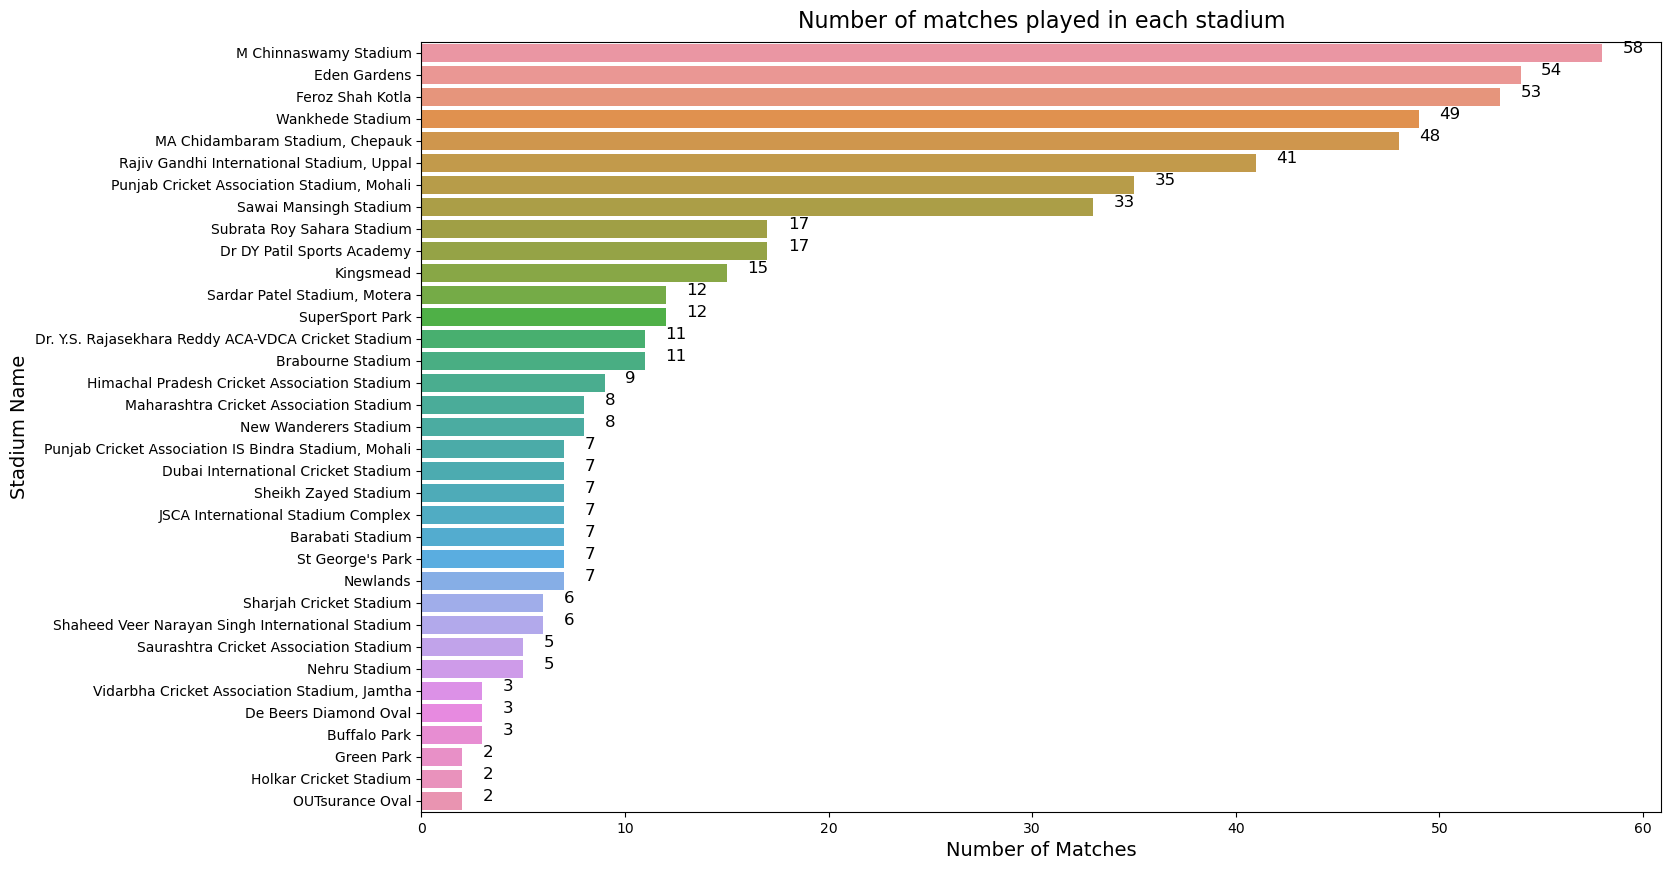

In [9]:
plt.figure(figsize = (16,10))
sns.barplot(x = 'Matches_Played',y = 'Venue_Name',data = queryconn)
plt.xlabel('Number of Matches', fontsize = 14)
plt.ylabel('Stadium Name', fontsize = 14)
plt.title('Number of matches played in each stadium',fontsize = 16, pad = 10)
labels = queryconn.Matches_Played.tolist()
for i in range(len(queryconn)):
    plt.text(x = queryconn.iloc[i,0] + 1, y = i, s = (labels[i]), fontsize = 12)
plt.show()

In [10]:
#3. Number of matches played in each city

In [11]:
query = """SELECT COUNT(*) as Matches_Played,c.City_Name From Match 
        m JOIN Venue v ON m.Venue_Id = v.Venue_Id JOIN city c ON  
        v.City_Id= c.City_Id GROUP BY v.City_Id ORDER BY Matches_Played DESC
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

    Matches_Played       City_Name
0               77          Mumbai
1               58       Bangalore
2               54         Kolkata
3               53           Delhi
4               48         Chennai
5               42      Chandigarh
6               41       Hyderabad
7               33          Jaipur
8               25            Pune
9               20       Abu Dhabi
10              15          Durban
11              12       Ahmedabad
12              12       Centurion
13              11   Visakhapatnam
14               9      Dharamsala
15               8    Johannesburg
16               7          Ranchi
17               7         Cuttack
18               7  Port Elizabeth
19               7       Cape Town
20               6          Raipur
21               5          Rajkot
22               5           Kochi
23               3          Nagpur
24               3       Kimberley
25               3     East London
26               2          Kanpur
27               2  

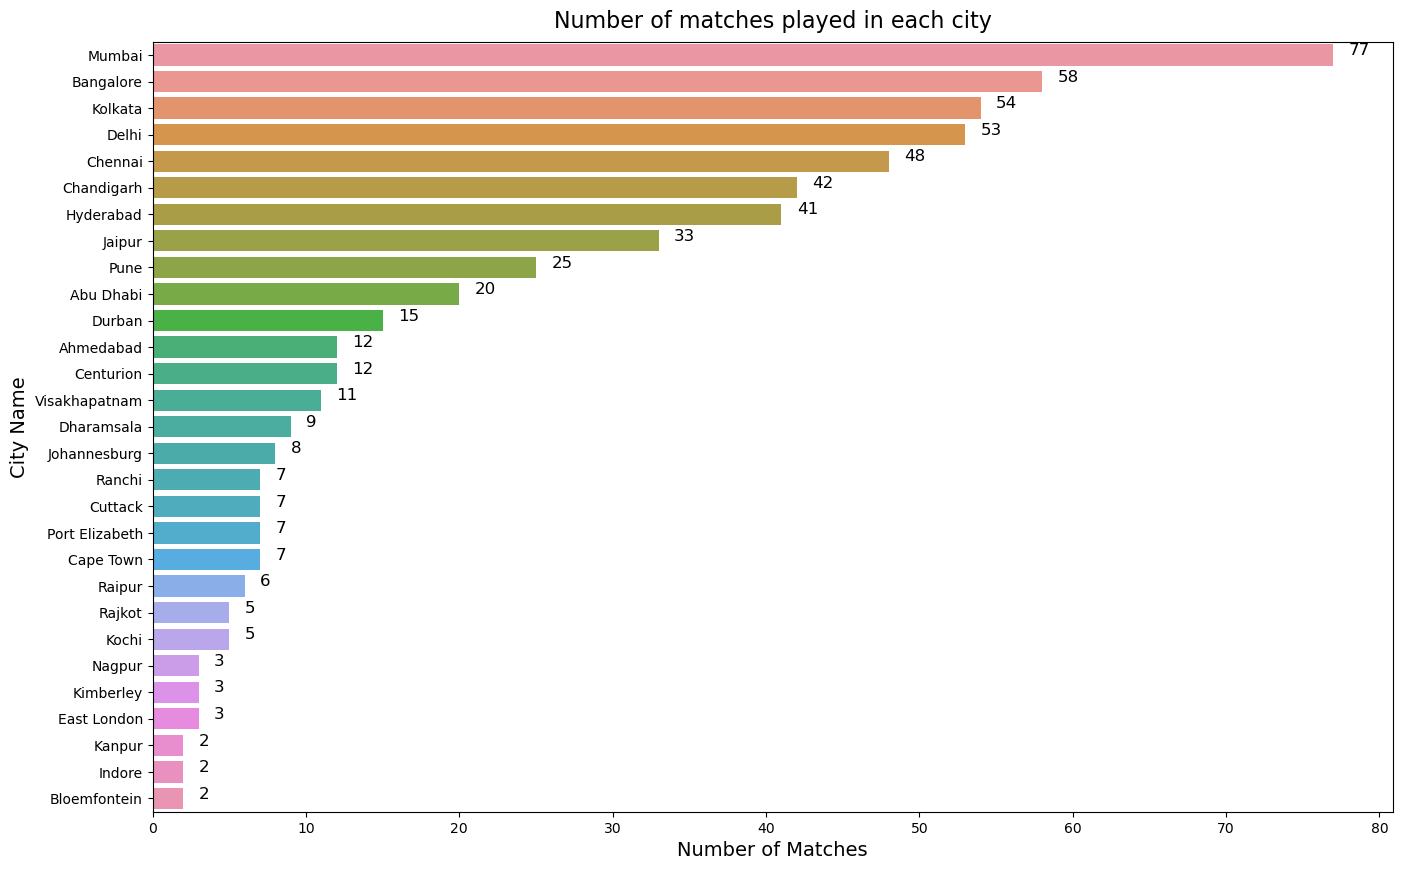

In [12]:
plt.figure(figsize = (16,10))
sns.barplot(x = 'Matches_Played',y = 'City_Name',data = queryconn)
plt.xlabel('Number of Matches', fontsize = 14)
plt.ylabel('City Name', fontsize = 14)
plt.title('Number of matches played in each city',fontsize = 16, pad = 10)
labels = queryconn.Matches_Played.tolist()
for i in range(len(queryconn)):
    plt.text(x = queryconn.iloc[i,0] + 1, y = i, s = (labels[i]), fontsize = 12)
plt.show()

In [13]:
#4. How the toss decisions changed over the seasons

In [14]:
query = """SELECT Season_year, 
                Toss_Name, 
                Count(Toss_Name) AS Frequency FROM Match m JOIN Team t ON m.Toss_Winner = t.Team_Id
           JOIN Toss_Decision td ON  m.Toss_Decide = td.Toss_Id
           JOIN Season s ON s.Season_Id = m.Season_Id   GROUP BY Season_year, Toss_Name
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

    Season_Year Toss_Name  Frequency
0          2008       bat         26
1          2008     field         32
2          2009       bat         35
3          2009     field         22
4          2010       bat         39
5          2010     field         21
6          2011       bat         25
7          2011     field         48
8          2012       bat         37
9          2012     field         37
10         2013       bat         45
11         2013     field         31
12         2014       bat         19
13         2014     field         41
14         2015       bat         25
15         2015     field         34
16         2016       bat         11
17         2016     field         49


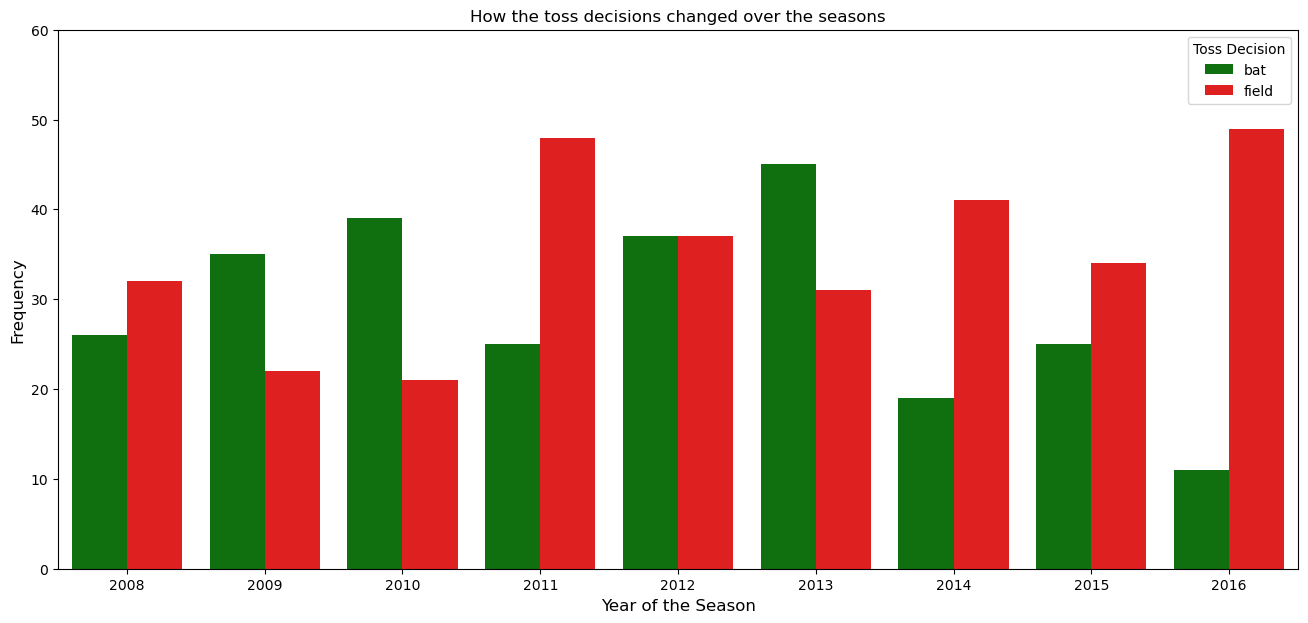

In [15]:
plt.figure(figsize = (16,7))
sns.barplot(x = 'Season_Year', y = 'Frequency',hue = 'Toss_Name', data = queryconn , palette = ['green', 'red'] )
plt.title('How the toss decisions changed over the seasons',fontsize = 12)
plt.xlabel('Year of the Season',fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.ylim(0,60)
plt.legend(title = 'Toss Decision')
plt.show()

In [16]:
#5. Man of the Series, Purple Cap, Orange Cap winners in every season

In [17]:
query = """SELECT Season_Year,oc.Player_Name as Orange_Cap, mos.Player_Name as Man_of_the_Series, pc.Player_Name as Purple_Cap From Season s JOIN 
            Player mos ON s.Man_of_the_Series = mos.Player_Id JOIN Player as oc ON oc.Player_Id = s.Orange_Cap
            JOIN Player as pc ON pc.Player_Id = s.Purple_Cap
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

   Season_Year    Orange_Cap Man_of_the_Series     Purple_Cap
0         2008      SE Marsh         SR Watson  Sohail Tanvir
1         2009     ML Hayden      AC Gilchrist       RP Singh
2         2010  SR Tendulkar      SR Tendulkar        PP Ojha
3         2011      CH Gayle          CH Gayle     SL Malinga
4         2012      CH Gayle         SP Narine       M Morkel
5         2013    MEK Hussey         SR Watson       DJ Bravo
6         2014    RV Uthappa        GJ Maxwell      MM Sharma
7         2015     DA Warner        AD Russell       DJ Bravo
8         2016       V Kohli           V Kohli        B Kumar


In [18]:
#6. Total Runs scored for the over in all matches.

In [19]:
query = """SELECT Over_Id as Over,SUM(Runs_Scored) as Run_Scored From Batsman_Scored GROUP BY Over_Id
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

    Over  Run_Scored
0      1        6240
1      2        7407
2      3        8176
3      4        8685
4      5        8758
5      6        8755
6      7        7093
7      8        7705
8      9        7906
9     10        7770
10    11        8207
11    12        8409
12    13        8323
13    14        8554
14    15        8880
15    16        9035
16    17        9368
17    18        9463
18    19        9019
19    20        8208


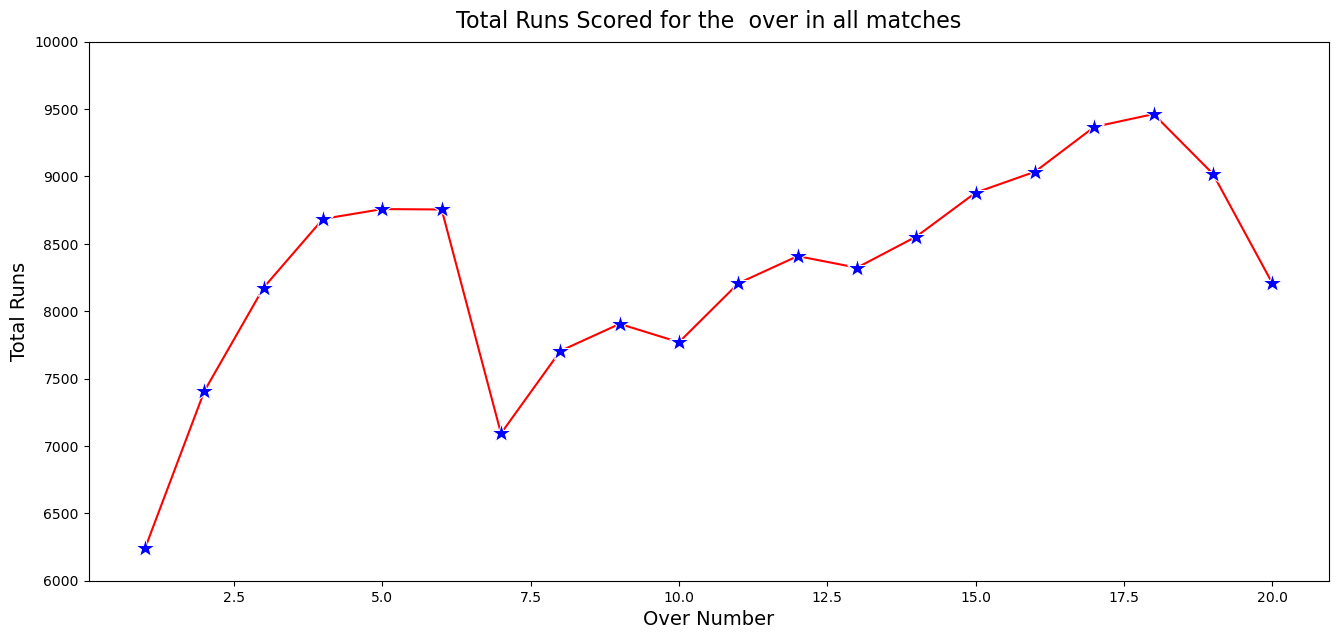

In [20]:
plt.figure(figsize = (16,7))
sns.lineplot(x = 'Over',y = 'Run_Scored',data = queryconn,marker = '*', color = 'red', markersize = 15, markerfacecolor = 'blue')
plt.xlabel('Over Number', fontsize = 14)
plt.ylabel('Total Runs', fontsize = 14)
plt.title('Total Runs Scored for the  over in all matches',fontsize = 16, pad = 10)
plt.ylim(6000,10000)
plt.show()

In [21]:
#7. Cross Tabulation of Overs and Kind of Dismissals

In [22]:
query = """SELECT Over_Id, 
           COUNT(CASE WHEN Out_Name = 'caught' THEN Out_Id END) AS Caught,
           COUNT(CASE WHEN Out_Name = 'bowled' THEN Out_Id END) AS Bowled,
           COUNT(CASE WHEN Out_Name = 'run out' THEN Out_Id END) AS Run_Out,
           COUNT(CASE WHEN Out_Name = 'lbw' THEN Out_Id END) AS Lbw,
           COUNT(CASE WHEN Out_Name = 'retired hurt' THEN Out_Id END) AS Retired_hurt,
           COUNT(CASE WHEN Out_Name = 'stumped' THEN Out_Id END) AS Stumped,
           COUNT(CASE WHEN Out_Name = 'caught and bowled' THEN Out_Id END) AS Caught_and_bowled,
           COUNT(CASE WHEN Out_Name = 'hit wicket' THEN Out_Id END) AS Hit_wicket,
           COUNT(CASE WHEN Out_Name = 'obstructing the field' THEN Out_Id END) AS Obstructing_the_field
    FROM  Wicket_Taken
    JOIN  Out_Type on Out_Type.Out_Id = Wicket_Taken.Kind_Out
    GROUP BY  Over_Id
        """
queryconn = pd.read_sql_query(query,con)

In [23]:
queryconn.set_index('Over_Id', inplace = True)

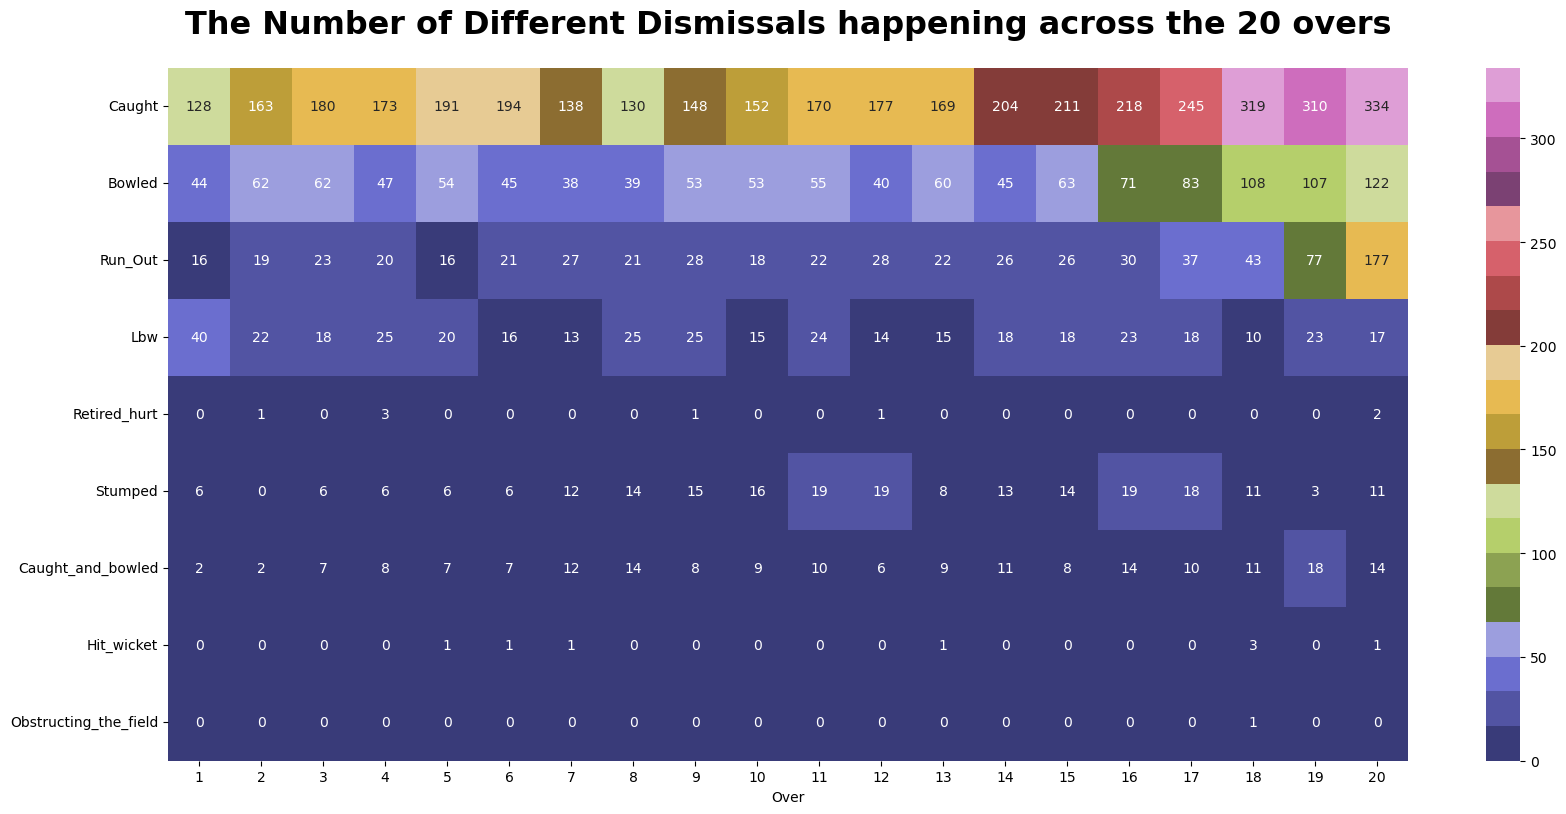

In [24]:
plt.figure(figsize = (20,9))
sns.heatmap(queryconn.transpose(), annot = True, fmt = '.3g', cmap = 'tab20b')
plt.title('The Number of Different Dismissals happening across the 20 overs', fontsize = 23, pad = 25, weight = 'bold')
plt.xlabel('Over')
plt.show()

In [25]:
#8. Total Number of Match Wins by each team

In [26]:
query = """SELECT Team_Name,COUNT(*) as Total_Match_Wins FROM Team t JOIN  Match m ON   t.Team_Id = m.Match_Winner GROUP BY m.Match_Winner ORDER BY Total_Match_Wins DESC    
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

                      Team_Name  Total_Match_Wins
0                Mumbai Indians                80
1           Chennai Super Kings                79
2   Royal Challengers Bangalore                70
3         Kolkata Knight Riders                68
4              Rajasthan Royals                63
5               Kings XI Punjab                63
6              Delhi Daredevils                56
7           Sunrisers Hyderabad                34
8               Deccan Chargers                29
9                 Pune Warriors                12
10                Gujarat Lions                 9
11         Kochi Tuskers Kerala                 6
12      Rising Pune Supergiants                 5


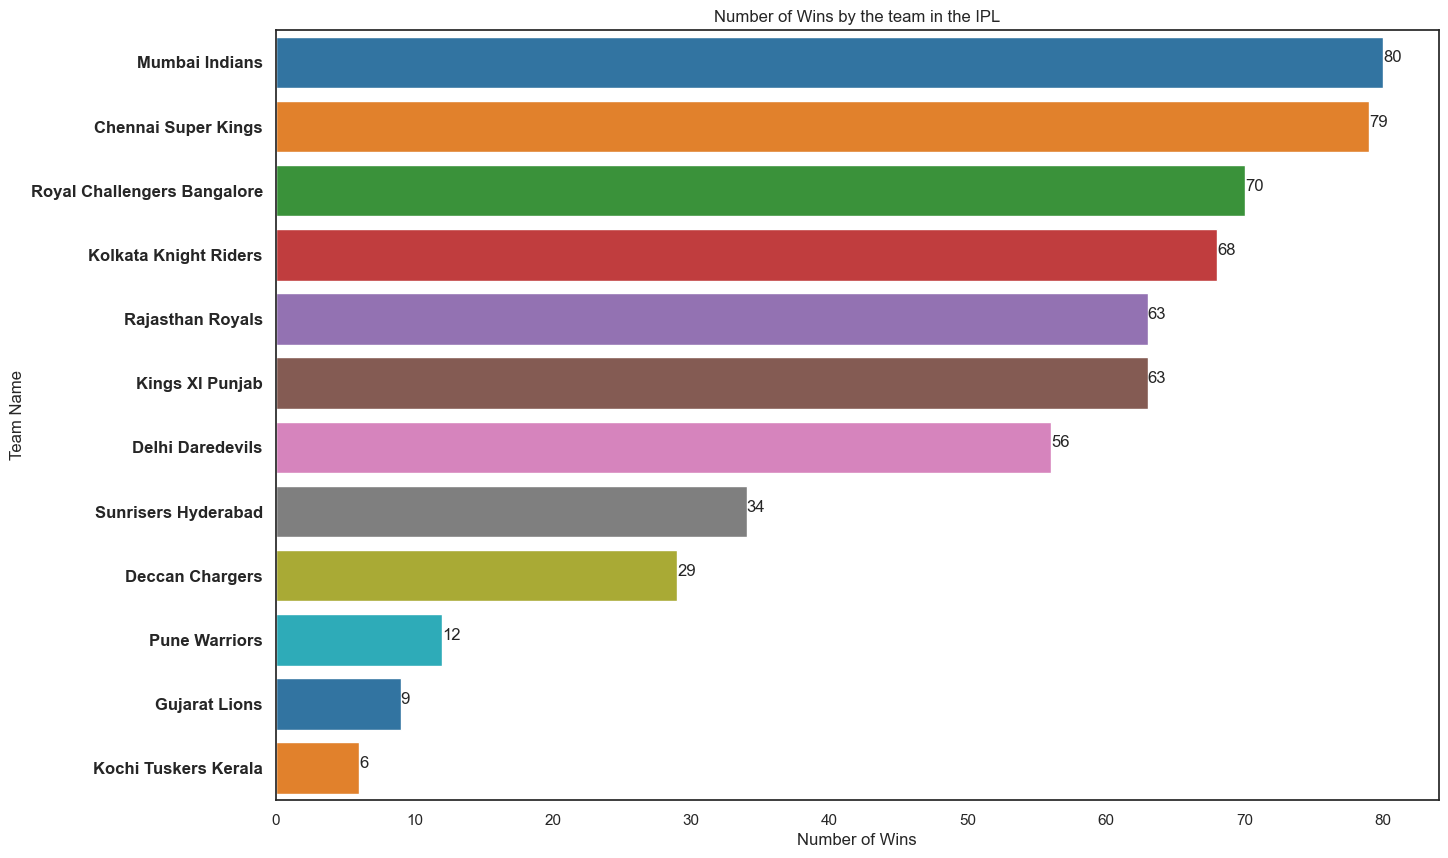

In [27]:
plt.figure(figsize = (15,10))
sns.set_theme(style="white", palette=None)
sns.barplot(y = 'Team_Name', x = 'Total_Match_Wins', data = queryconn.iloc[:-1,:], palette = 'tab10')
plt.yticks(fontsize = 12, weight = 'bold')
plt.ylabel('Team Name', fontsize = 12)
plt.xlabel('Number of Wins', fontsize = 12, )
plt.title('Number of Wins by the team in the IPL', fontsize = 12)
labels = queryconn.Total_Match_Wins.tolist()[:-1]
for i in range(len(queryconn)-1):
    plt.text(x = queryconn.iloc[i,1], y = i, s = (labels[i]), fontsize = 12)
plt.show()

In [28]:
#9. Top 10 Man of the Match Award Winners

In [29]:
query = """SELECT p.Player_Name,COUNT(m.Man_of_the_Match) as Total_MOM_Awards  FROM Match m 
           JOIN Player p ON m.Man_of_the_Match = p.Player_Id GROUP BY m.Man_of_the_Match ORDER BY Total_MOM_Awards DESC limit 10                                    
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

      Player_Name  Total_MOM_Awards
0        CH Gayle                17
1       YK Pathan                16
2  AB de Villiers                15
3       DA Warner                14
4       RG Sharma                13
5        SK Raina                13
6       AM Rahane                12
7       G Gambhir                12
8        MS Dhoni                12
9      MEK Hussey                12


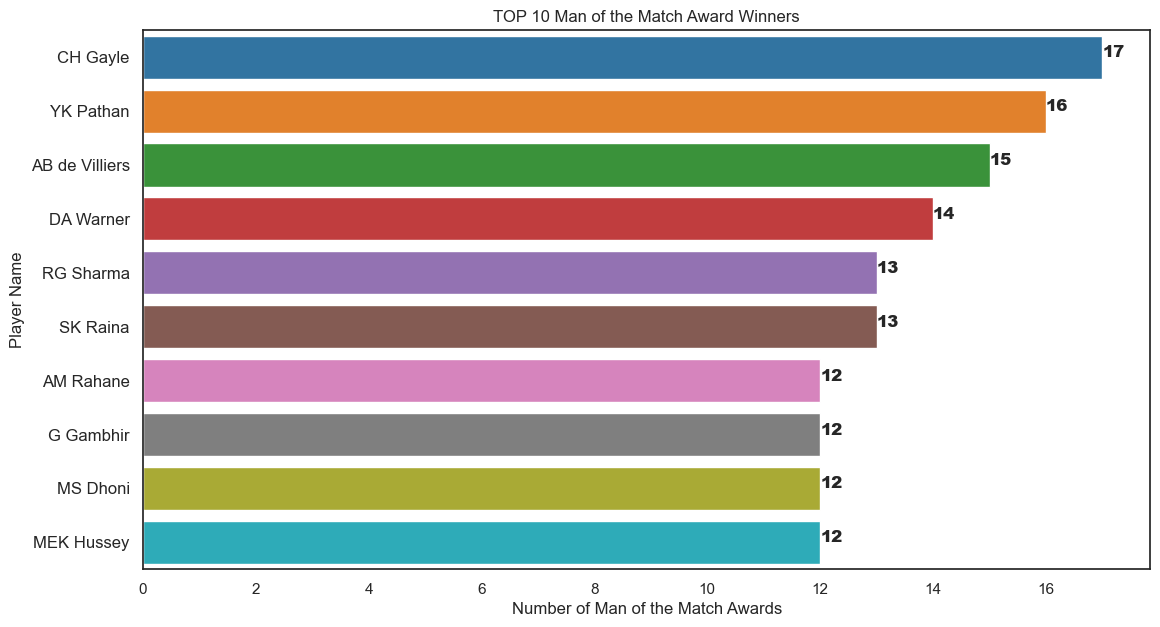

In [30]:
plt.figure(figsize = (13,7))
sns.barplot( y = 'Player_Name', x = 'Total_MOM_Awards', data = queryconn)
plt.xlabel('Number of Man of the Match Awards', fontsize = 12)
plt.ylabel('Player Name', fontsize = 12)
plt.title('TOP 10 Man of the Match Award Winners', fontsize = 12)
plt.yticks(fontsize = 12)
labels = queryconn.Total_MOM_Awards.tolist()
for i in range(len(queryconn)):
    plt.text(x = queryconn.iloc[i,1], y = i, s = (labels[i]), fontsize = 12, weight = 1000)
plt.show()

In [31]:
#10. Top 10 Highest Run Scorers

In [32]:
query = """SELECT Subquery.Player_Name, 
             SUM(Subquery.Runs_Scored)  AS Total_Runs,
             COUNT(DISTINCT Subquery.Match_Id) AS No_of_Innings,
             Subquery.Batting_hand FROM 
      (SELECT 
         Ball_by_Ball.Match_Id, 
         Ball_by_Ball.Over_Id,
         Ball_by_Ball.Ball_Id,
         Ball_by_Ball.Innings_No,
         Ball_by_Ball.Team_Batting,
         Ball_by_Ball.Team_Bowling,
         Ball_by_Ball.Striker_Batting_Position,
         Ball_by_Ball.Striker,
         Ball_by_Ball.Non_Striker,
         Ball_by_Ball.Bowler,
         Batsman_Scored.Runs_Scored,
         Player.Player_Name,
         Batting_Style.Batting_hand
   FROM Ball_by_Ball 
   JOIN Batsman_Scored ON Batsman_Scored.Match_Id = Ball_by_Ball.Match_Id 
                       AND Batsman_Scored.Over_Id = Ball_by_Ball.Over_Id 
                       AND Batsman_Scored.Ball_Id = Ball_by_Ball.Ball_Id
                       AND Batsman_Scored.Innings_No = Ball_by_Ball.Innings_No
   JOIN Player ON Player.Player_Id = Ball_by_Ball.Striker
   JOIN Batting_Style ON Player.Batting_hand = Batting_Style.Batting_Id) AS Subquery
   GROUP BY Player_Name
   ORDER BY Total_Runs DESC 
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

      Player_Name  Total_Runs  No_of_Innings    Batting_hand
0        SK Raina        4106            143   Left-hand bat
1         V Kohli        4105            131  Right-hand bat
2       RG Sharma        3874            137  Right-hand bat
3       G Gambhir        3634            130   Left-hand bat
4        CH Gayle        3447             91   Left-hand bat
..            ...         ...            ...             ...
429      L Ablish           0              1  Right-hand bat
430     IC Pandey           0              1  Right-hand bat
431       C Nanda           0              1  Right-hand bat
432  Abdur Razzak           0              1   Left-hand bat
433       A Zampa           0              1  Right-hand bat

[434 rows x 4 columns]


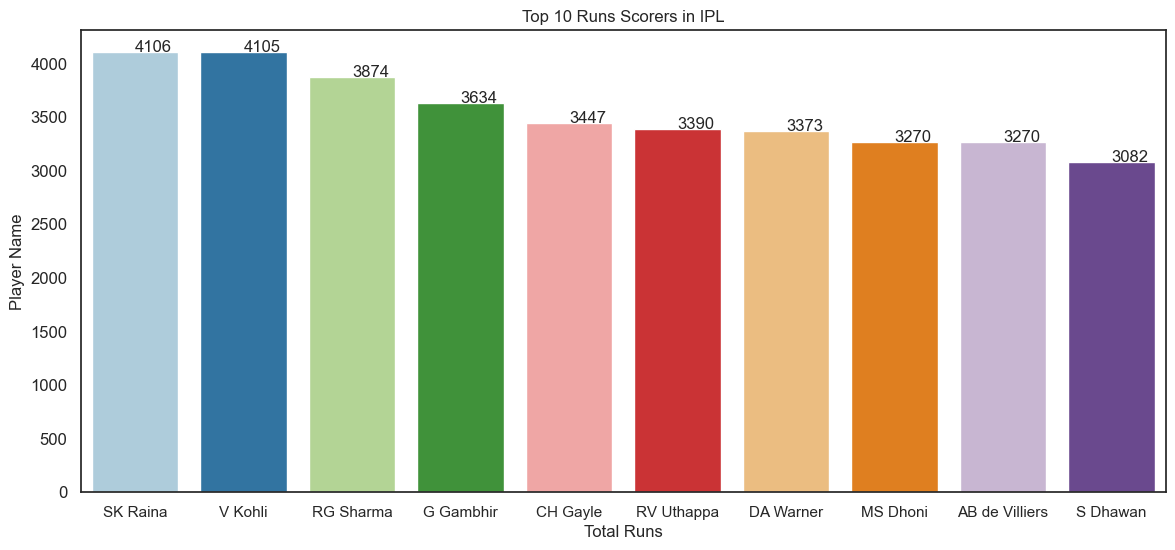

In [33]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'Player_Name', y = 'Total_Runs' , data = queryconn[:10], palette ='Paired')
plt.title('Top 10 Runs Scorers in IPL', fontsize  = 12)
plt.xlabel('Total Runs',fontsize = 12)
plt.ylabel('Player Name', fontsize = 12)
plt.yticks(fontsize = 12)
labels = queryconn.Total_Runs.tolist()[:10]
for i in range(10):
    plt.text(y = queryconn.iloc[i,1], x = i, s = (labels[i]), fontsize = 12)
plt.show()

In [34]:
#11. Distribution of Batsman Total Runs & Total Innings

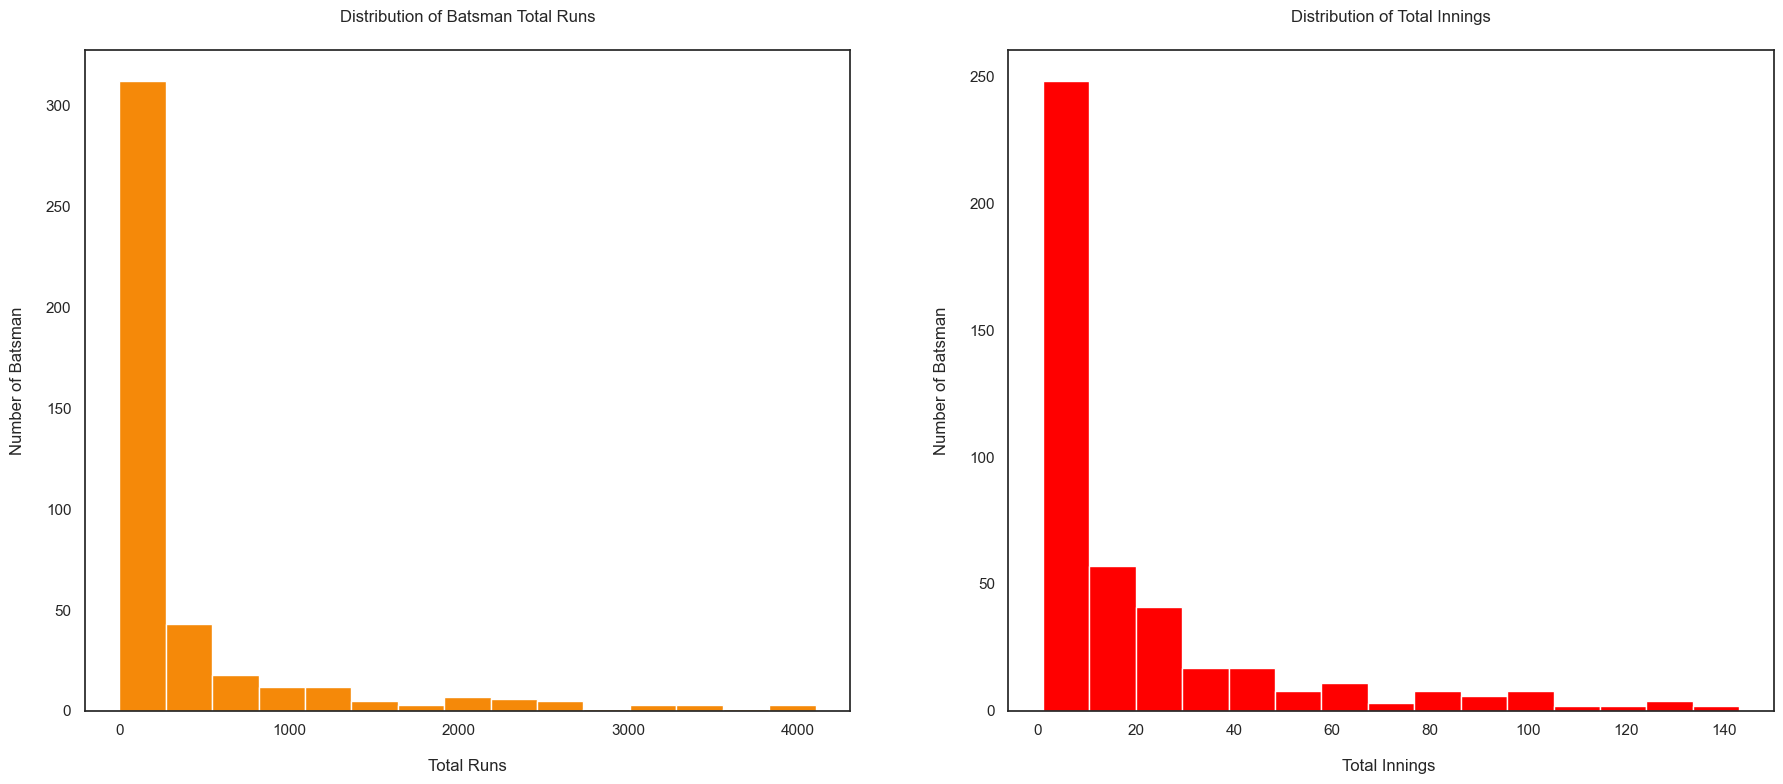

In [35]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
sns.set_theme(style="white", palette=None)
sns.histplot(x = queryconn['Total_Runs'], bins = 15,color = '#F58909',legend = False,alpha = 1, ax = ax[0])
sns.histplot(x = queryconn.No_of_Innings, bins = 15, color = 'red', legend = False, alpha = 1, ax = ax[1])
ax[0].set_title('Distribution of Batsman Total Runs', pad = 20, fontsize = 12)
ax[0].set_xlabel('Total Runs', labelpad = 15, fontsize = 12)
ax[0].set_ylabel('Number of Batsman', labelpad = 15, fontsize = 12)
ax[1].set_title('Distribution of Total Innings', pad = 20, fontsize = 12)
ax[1].set_xlabel('Total Innings ', labelpad = 15, fontsize = 12)
ax[1].set_ylabel('Number of Batsman', labelpad = 15, fontsize = 12)
fig.tight_layout(w_pad = 5)
plt.show()

In [36]:
#12. Scatter Plot of Total Runs and Innings

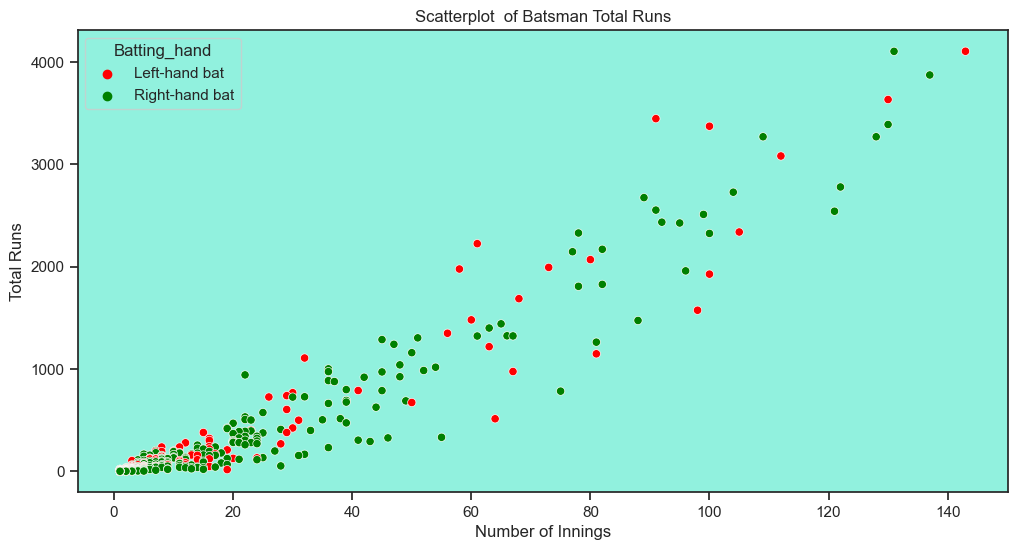

In [37]:
plt.figure(figsize = (12,6))
sns.set_theme(style="white", palette=None)
sns.set_theme(style = 'ticks', context = 'notebook', rc = {'axes.facecolor': '#91F1DE', 'figure.facecolor': '#F1E491'})
sns.scatterplot(x= 'No_of_Innings', y = 'Total_Runs', hue = 'Batting_hand', palette = sns.blend_palette(['red','green'],2),data = queryconn, facecolor = 'red')
plt.title('Scatterplot  of Batsman Total Runs', fontsize = 12, alpha = 1)
plt.xlabel('Number of Innings', fontsize = 12)
plt.ylabel('Total Runs', fontsize = 12)
plt.show()

In [38]:
#13. Frequency Distribution of Various Dismissals Type

In [39]:
query = """SELECT Out_Name as Dismissal_Type, COUNT(Out_Name) as No_of_Dismissals FROM Wicket_Taken  wt JOIN Out_Type ot ON wt.Kind_Out = ot.Out_Id GROUP BY Out_Name ORDER BY No_of_Dismissals DESC                                                
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

          Dismissal_Type  No_of_Dismissals
0                 caught              3954
1                 bowled              1251
2                run out               697
3                    lbw               399
4                stumped               222
5      caught and bowled               187
6           retired hurt                 8
7             hit wicket                 8
8  obstructing the field                 1


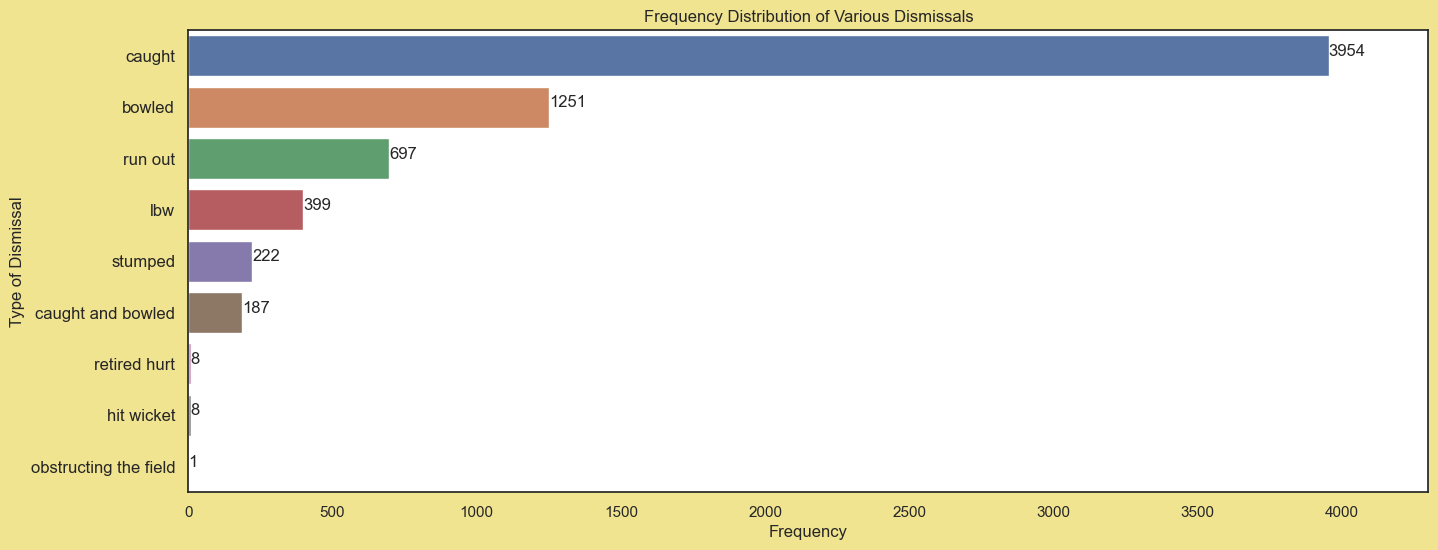

In [40]:
plt.figure(figsize = (16,6))
sns.set_theme(style="white", palette=None)
sns.barplot(y = 'Dismissal_Type', x = 'No_of_Dismissals',data = queryconn)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('Type of Dismissal', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0,4300)
plt.title('Frequency Distribution of Various Dismissals',fontsize = 12)
labels = queryconn.No_of_Dismissals.tolist()
for i in range(len(queryconn)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = queryconn.iloc[i,1], y = i, s = (labels[i]), fontsize = 12)
plt.show()

In [41]:
#14. Frequency of Different Bowlers

In [42]:
query = """SELECT bs.Bowling_skill,COUNT(*) as Number_of_bowlers FROM  Player p JOIN Bowling_Style bs ON p.Bowling_skill = bs.Bowling_Id  GROUP BY bs.Bowling_Id                                              
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

             Bowling_skill  Number_of_bowlers
0         Right-arm medium                104
1       Right-arm offbreak                 81
2    Right-arm fast-medium                 53
3          Legbreak googly                 21
4    Right-arm medium-fast                 38
5     Left-arm fast-medium                 13
6   Slow left-arm orthodox                 44
7   Slow left-arm chinaman                  5
8     Left-arm medium-fast                  8
9                 Legbreak                 24
10          Right-arm fast                 20
11        Right-arm bowler                  1
12         Left-arm medium                 11
13           Left-arm fast                  3


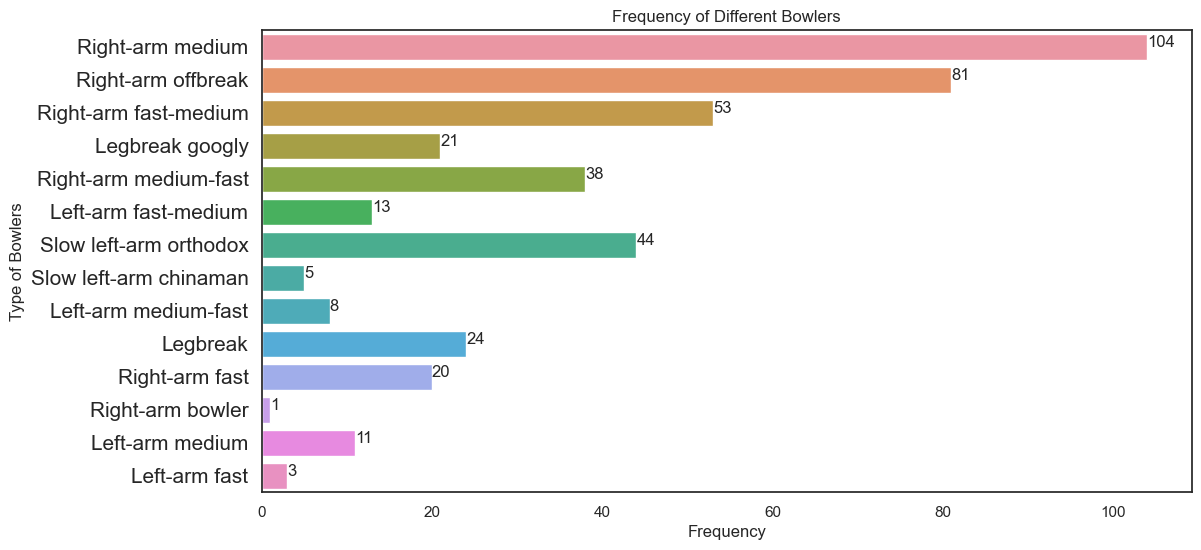

In [43]:
plt.figure(figsize = (12,6))
sns.set_theme(style="white", palette=None)
sns.barplot(y = 'Bowling_skill', x = 'Number_of_bowlers',data = queryconn)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('Type of Bowlers', fontsize = 12)
plt.yticks(fontsize = 15)
plt.title('Frequency of Different Bowlers',fontsize = 12)
labels = queryconn.Number_of_bowlers.tolist()
for i in range(len(queryconn)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = queryconn.iloc[i,1], y = i, s = (labels[i]), fontsize = 12)
plt.show()

In [44]:
#15. Top 10 Players who got out Maximum times
query = """SELECT COUNT(*) as Out_Count ,p.Player_Name FROM Wicket_Taken wt JOIN 
           Player p ON wt.Player_Out = p.Player_Id GROUP BY wt.Player_Out  ORDER BY Out_Count DESC limit 10                                         
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

   Out_Count   Player_Name
0        123      SK Raina
1        119     G Gambhir
2        115     RG Sharma
3        115    RV Uthappa
4        108       V Kohli
5        107    KD Karthik
6         99      V Sehwag
7         96      S Dhawan
8         95       M Vijay
9         92  Yuvraj Singh


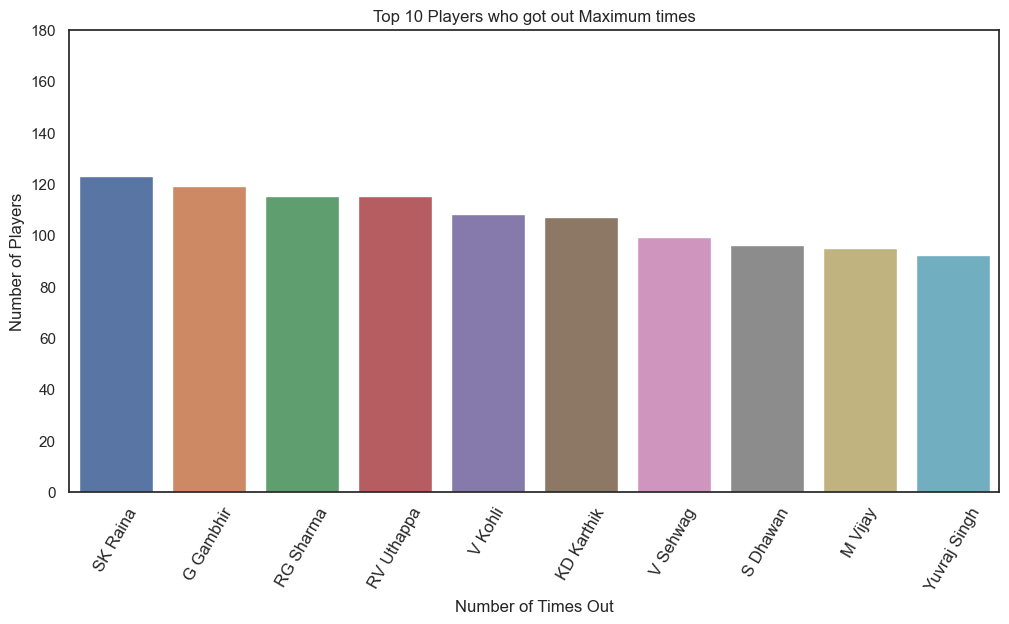

In [45]:
plt.figure(figsize = (12,6))
sns.set_theme(style="white", palette=None)
sns.barplot(x = 'Player_Name',y = 'Out_Count',data = queryconn)
plt.xlabel('Number of Times Out', fontsize = 12)
plt.ylabel('Number of Players', fontsize = 12)
plt.xticks(rotation = 60 , fontsize = 12)
plt.ylim(0,180)
plt.title('Top 10 Players who got out Maximum times',fontsize = 12)
plt.show()

In [46]:
#16. Top 10 Wicket Takers

In [47]:
query = """SELECT p.Player_Name, COUNT(*) Total_Wickets FROM Wicket_Taken wt 
            JOIN Ball_by_Ball bbb ON wt.Match_Id = bbb.Match_Id AND wt.Over_Id = bbb.Over_Id AND wt.Ball_Id = bbb.Ball_Id AND wt.Innings_No = bbb.Innings_No 
            JOIN Player p ON p.Player_Id = bbb.Bowler GROUP BY bbb.Bowler ORDER BY  Total_Wickets DESC    limit 10                                             
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

       Player_Name  Total_Wickets
0       SL Malinga            159
1         DJ Bravo            137
2         A Mishra            132
3  Harbhajan Singh            128
4        PP Chawla            127
5    R Vinay Kumar            123
6          A Nehra            111
7         R Ashwin            110
8           Z Khan            107
9         DW Steyn            100


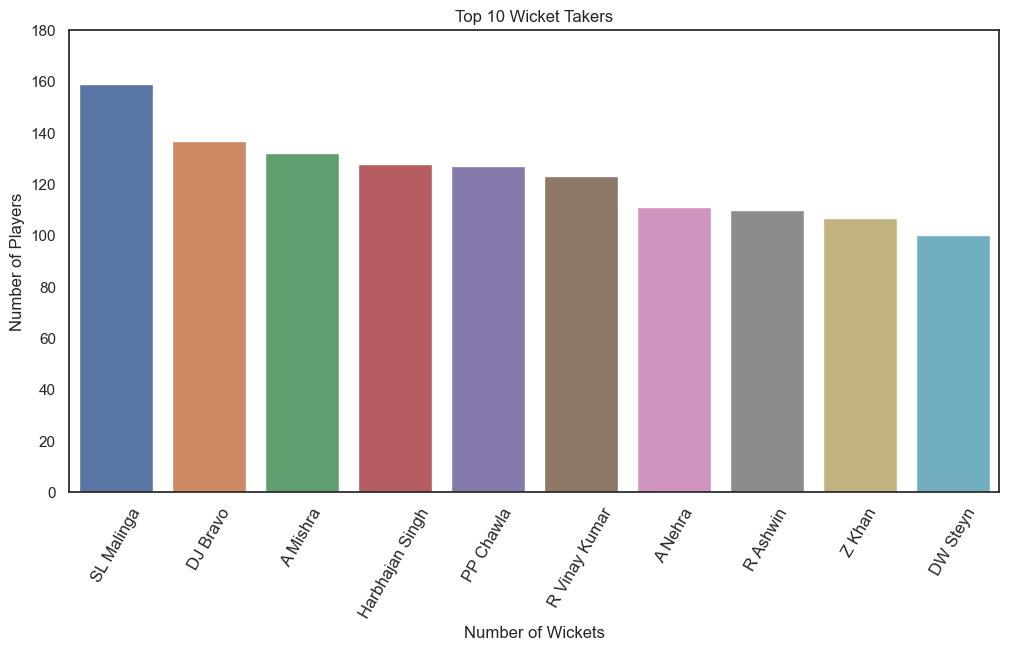

In [48]:
plt.figure(figsize = (12,6))
sns.set_theme(style="white", palette=None)
sns.barplot(x = 'Player_Name',y = 'Total_Wickets',data = queryconn)
plt.xlabel('Number of Wickets', fontsize = 12)
plt.ylabel('Number of Players', fontsize = 12)
plt.xticks(rotation = 60 , fontsize = 12)
plt.ylim(0,180)
plt.title('Top 10 Wicket Takers',fontsize = 12)
plt.show()

In [49]:
#17. Variation in Total Extras in a Match Over Time

In [50]:
query = """SELECT Match_Id,SUM(Extra_Runs) as Total_Extras FROM Extra_Runs GROUP BY Match_Id                                                        
        """
queryconn = pd.read_sql_query(query,con)
print(queryconn)

     Match_Id  Total_Extras
0      335987            36
1      335988            17
2      335989            17
3      335990            16
4      335991            38
..        ...           ...
572    981016            16
573    981018            27
574    981020            15
575    981022             7
576    981024            23

[577 rows x 2 columns]


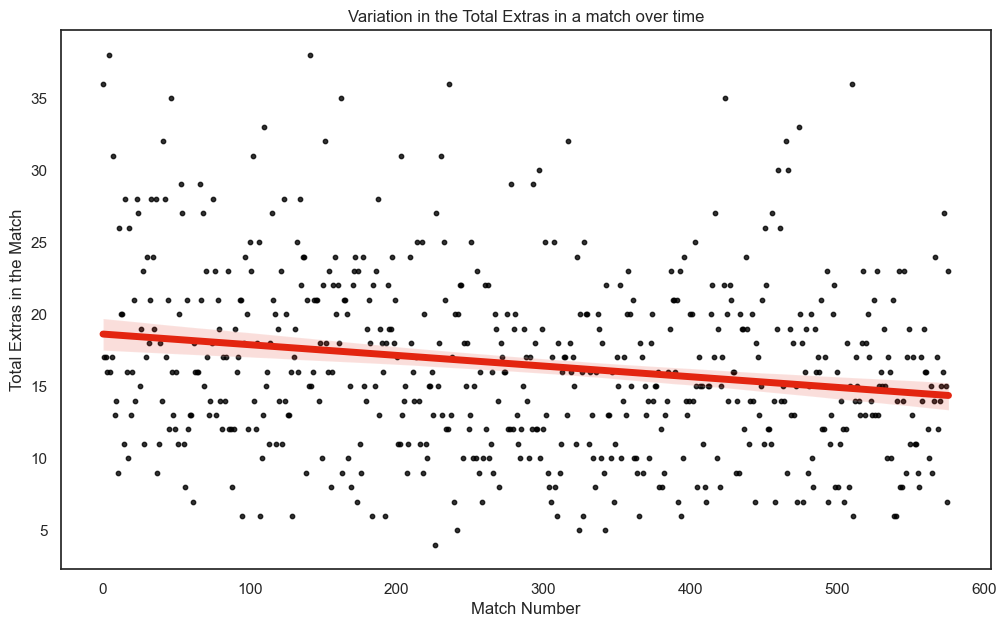

In [51]:
plt.figure(figsize = (12,7))
sns.set_theme(style="white", palette=None)
sns.regplot(x = queryconn.index, y = queryconn.Total_Extras, data = queryconn, color = 'black', scatter_kws = {'s':10}, line_kws= {'color' : '#E32510', 'linewidth' : 5})
plt.title('Variation in the Total Extras in a match over time', fontsize = 12)
plt.xlabel('Match Number')
plt.ylabel('Total Extras in the Match')
plt.show()